In [2]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.optim import SGD

In [3]:
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1)) # flattens the data
])

In [4]:
batch_size = 64

trainset = datasets.MNIST(root='./data2', train=True,
                                        download=True, transform=transforms)
trainloader = DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = datasets.MNIST(root='./data2', train=False,
                                       download=True, transform=transforms)
testloader = DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

In [5]:
trainset[0][0].shape # input features

torch.Size([784])

In [6]:
# No. of samples in trainset
len(trainloader) * batch_size

60032

In [7]:
# No. of samples in testset
len(testloader) * batch_size

10048

In [11]:
class LogisticRegression(nn.Module):
    def __init__(self, x_dim, y_dim):
        super(LogisticRegression,self).__init__()
        self.linear = nn.Linear(x_dim,y_dim)
    def forward(self,X):
        X = self.linear(X)
        X = torch.sigmoid(X)
        return X

In [24]:
x_dim = trainset[0][0].shape[0]
y_dim = 10
hidden_dim = 128
model = LogisticRegression(x_dim,y_dim)
criterion = nn.CrossEntropyLoss()
epochs = 30
lr = 0.001
optimizer = SGD(model.parameters(),lr=lr)
losses = []
accuracy = []

In [25]:
for epoch in range(epochs):
    epoch_loss = 0
    for i ,(xi,yi)in enumerate(trainloader):

        output = model(xi)
        if epoch == 0 and  i == 0:
            print(yi)
        loss = criterion(output,yi)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(trainloader)
    losses.append(avg_loss)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}')

tensor([2, 5, 1, 3, 4, 7, 7, 7, 9, 9, 2, 7, 8, 2, 9, 5, 7, 3, 1, 8, 9, 3, 0, 9,
        1, 0, 3, 8, 9, 1, 0, 7, 5, 1, 2, 9, 6, 4, 0, 3, 6, 4, 6, 0, 4, 7, 2, 6,
        2, 2, 9, 1, 7, 9, 7, 8, 4, 3, 6, 6, 5, 0, 7, 0])
Epoch 1/30, Loss: 2.280866370018103
Epoch 2/30, Loss: 2.223083820678532
Epoch 3/30, Loss: 2.173611764714662


KeyboardInterrupt: 

Text(0, 0.5, 'Loss')

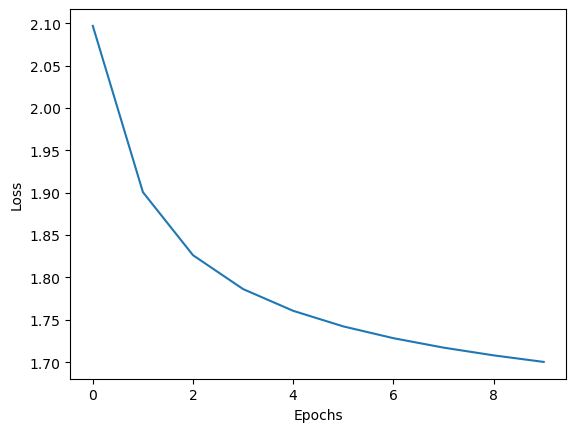

In [22]:
import matplotlib.pyplot as plt
plt.plot(range(epochs),losses,label = 'loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [12]:
PATH = './mnist-only-linear-hidden.pth'
torch.save(model.state_dict(), PATH)

In [13]:
from sklearn.metrics import r2_score

model.eval()
test_loss = 0
all_outputs = []
all_targets = []
with torch.no_grad(): 
    for xi, yi in testloader:
        yi = yi.float().view(-1, 1)
        output = model(xi)
        loss = criterion(output, yi)
        test_loss += loss.item()

        all_outputs.append(output)
        all_targets.append(yi)

all_outputs = torch.cat(all_outputs).numpy()
all_targets = torch.cat(all_targets).numpy()

avg_test_loss = test_loss / len(testloader)
print(f'Test Loss: {avg_test_loss}')
print(f'R2 Score: {r2_score(all_targets,all_outputs)}')


Test Loss: 3.151611300031091
R2 Score: 0.6243277788162231
